<a href="https://colab.research.google.com/github/saiprakashgorti/Illinois-CS-441/blob/main/Sai_Prakash_Gorti_CS441_FA24_HW2_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS441: Applied ML - HW 2

### Parts 1-2: MNIST

Include all the code for generating MNIST results below

In [2]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression


def load_mnist():
  '''
  Loads, reshapes, and normalizes the data
  '''
  (x_train, y_train), (x_test, y_test) = mnist.load_data() # loads MNIST data
  x_train = x_train[::-1]
  y_train = y_train[::-1]
  x_train = np.reshape(x_train, (len(x_train), 28*28))  # reformat to 784-d vectors
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval  # normalize values to range from 0 to 1
  x_test = x_test/maxval
  return (x_train, y_train), (x_test, y_test)

def display_mnist(x, subplot_rows=1, subplot_cols=1):
  '''
  Displays one or more examples in a row or a grid
  '''
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

### Part 1: PCA and Data Compression

Compute the principal components using sklearn.decomposition.PCA over the full training set.  

a. Display the first 10 principal components using the same
tool that is used to display centroids.

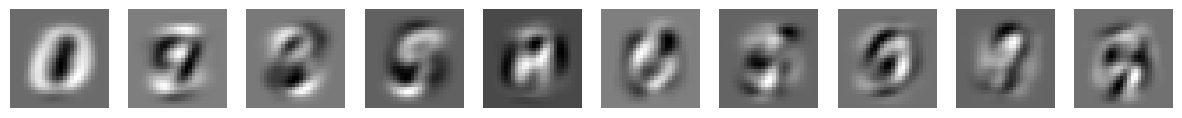

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = load_mnist()
# Compute the first 10 principal components using x_train
pca = PCA(n_components=10)

# TO DO
pca.fit(x_train)

# Display First 10 Components
display_mnist(pca.components_, 1, 10)



b. Scatterplot the first two dimensions of PCA-transformed x_train[:500]. Show a different color for each digit label.

<Axes: >

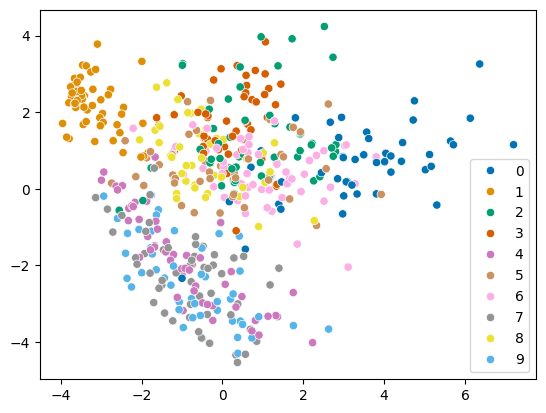

In [4]:
# Scatter plot of first two PCA dimensions
import seaborn as sns

# use pca.transform
# TO DO
x = pca.transform(x_train[:500])

ind = np.arange(500)
sns.scatterplot(x=x[ind,0],y=x[ind,1], hue=y_train[ind], palette="colorblind")

c. Plot cumulative explained variance (explained_variance_ratio_) of all components.

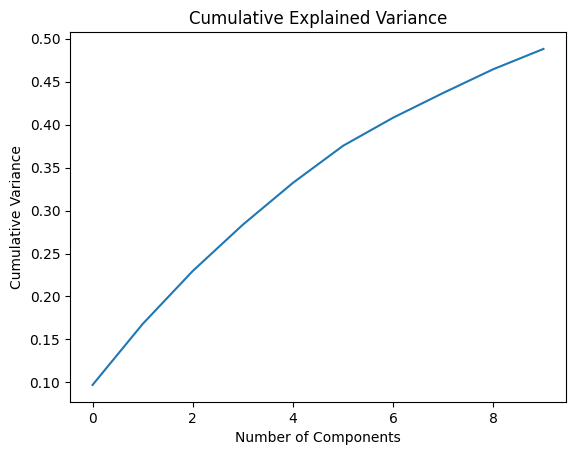

In [5]:
# Plot cumulative explained variance ratio
# cumsum and pca.explained_variance_ratio_ will be useful

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Explained Variance')
plt.show()

# TO DO

d. Select the smallest number M of principal components that explains at least 90% of variance. Then, compress the training data and the test data using the first M principal components, and compute the total time and test error for 1-NN using the brute force Faiss method. One set of principal components should be computed using train and applied to both train and test data. Compare time and error for 1-NN using original vs compressed features.

In [6]:
# Select number of dimensions that explains 90% of variance, according to your plot above
!apt install libomp-dev > /dev/null 2>&1
!pip install faiss-cpu > /dev/null 2>&1
import faiss
import time

# Get time and error when using original features with brute force 1-NN
# TO DO
index = faiss.IndexFlatL2(x_train.shape[1])
index.add(x_train)
start = time.time()
D, I = index.search(x_test, 1)
end = time.time()
print('Time:', end - start)
print('Error percentage with non PCA Brute Force:', np.mean(y_train[I.flatten()] != y_test) * 100)

# Get time and error when using compressed features with brute force 1-NN
# TO DO
index = faiss.IndexFlatL2(pca.n_components)
index.add(pca.transform(x_train))
start = time.time()
D, I = index.search(pca.transform(x_test), 1)
end = time.time()
print('Time:', end - start)
print('Error percentage with PCA Brute Force:', np.mean(y_train[I.flatten()] != y_test) * 100)


Time: 16.359911918640137
Error percentage with non PCA Brute Force: 3.09
Time: 0.31708312034606934
Error percentage with PCA Brute Force: 8.63


### Part 2: MNIST Classification with Linear Models

We revisit classification using linear logistic regression (LLR) and SVM. For logistic regression, use `sklearn.linear_model.LogisticRegression` with default parameters (unless stated otherwise), except `max_iter=500`. For SVM, use `sklearn.svm.LinearSVC` with default parameters, except `max_iter=500`.  Do not use `svm.SVC` since that is a non-linear SVM by default.  With  `max_iter=500`, it's ok if you get a warning that it hasn’t converged.  

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

(x_train, y_train), (x_test, y_test) = load_mnist()


def LLR_error(x_train_subset, y_train_subset):
  lr = LogisticRegression(max_iter=500)
  lr.fit(x_train_subset, y_train_subset)
  y_pred = lr.predict(x_test)
  return np.mean(y_pred != y_test)

def SVM_error(x_train_subset, y_train_subset):
  s = svm.LinearSVC(max_iter=500)
  s.fit(x_train_subset, y_train_subset)
  y_pred = s.predict(x_test)
  return np.mean(y_pred != y_test)

# for training samples 100, 1000, 10000, 60000

# LLR error percentage
llr_error_100 = LLR_error(x_train[:100], y_train[:100]) * 100
llr_error_1000 = LLR_error(x_train[:1000], y_train[:1000]) * 100
llr_error_10000 = LLR_error(x_train[:10000], y_train[:10000]) * 100
llr_error_60000 = LLR_error(x_train[:60000], y_train[:60000]) * 100

print('LLR error percentage for 100 samples: ', llr_error_100)
print('LLR error percentage for 1000 samples: ', llr_error_1000)
print('LLR error percentage for 10000 samples: ', llr_error_10000)
print('LLR error percentage for 60000 samples: ', llr_error_60000)

# SVM error percentage
svm_error_100 = SVM_error(x_train[:100], y_train[:100]) * 100
svm_error_1000 = SVM_error(x_train[:1000], y_train[:1000]) * 100
svm_error_10000 = SVM_error(x_train[:10000], y_train[:10000]) * 100
svm_error_60000 = SVM_error(x_train[:60000], y_train[:60000]) * 100

print('SVM error percentage for 100 samples: ', svm_error_100)
print('SVM error percentage for 1000 samples: ', svm_error_1000)
print('SVM error percentage for 10000 samples: ', svm_error_10000)
print('SVM error percentage for 60000 samples: ', svm_error_60000)

LLR error percentage for 100 samples:  49.8
LLR error percentage for 1000 samples:  18.08
LLR error percentage for 10000 samples:  9.47
LLR error percentage for 60000 samples:  7.41
SVM error percentage for 100 samples:  53.54
SVM error percentage for 1000 samples:  20.549999999999997
SVM error percentage for 10000 samples:  10.75
SVM error percentage for 60000 samples:  8.16


a. LLR/SVM vs training size: For varying size training sets N in [100, 1000, 10000, 60000], compare and tabulate classification error for linear logistic regression and linear SVM, using x_train[:N] and x_test.    

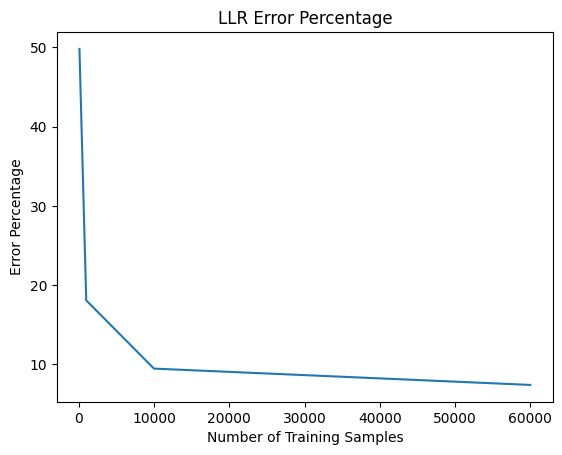

In [8]:
# LLR
# TO DO
plt.plot([100, 1000, 10000, 60000], [llr_error_100, llr_error_1000, llr_error_10000, llr_error_60000])
plt.xlabel('Number of Training Samples')
plt.ylabel('Error Percentage')
plt.title('LLR Error Percentage')
plt.show()



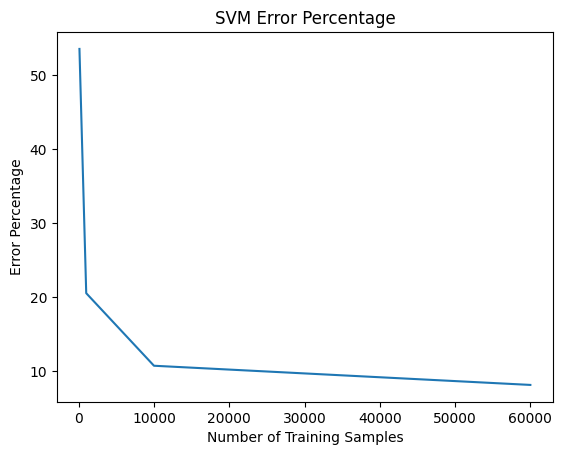

In [9]:
# SVM
# TO DO

plt.plot([100, 1000, 10000, 60000], [svm_error_100, svm_error_1000, svm_error_10000, svm_error_60000])
plt.xlabel('Number of Training Samples')
plt.ylabel('Error Percentage')
plt.title('SVM Error Percentage')
plt.show()

b. Error visualization: For each LLR and SVM, for each label (0 to 9), display the sample with the highest score for the *correct label*. E.g., out of all samples with a true label of 0, select the one that has the highest score for label 0. Display the 10 samples in a row for each method, showing the easy cases for each model.  Then, for each label, display the sample with the lowest score for the correct label. Again, display the 10 samples in a row, showing the difficult cases.

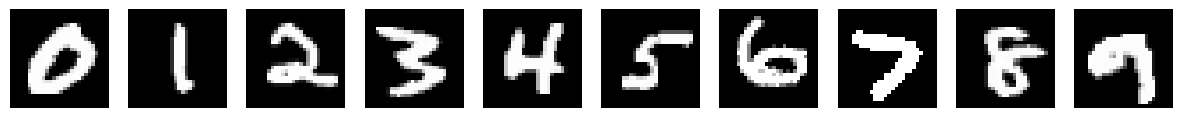

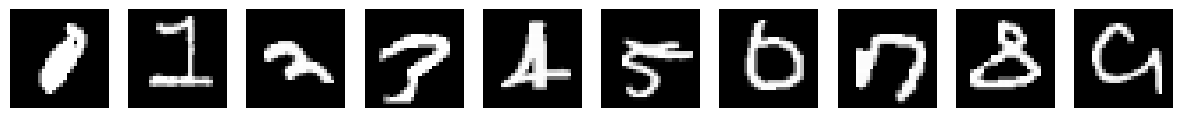

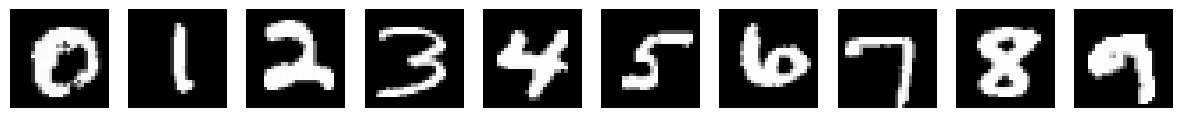

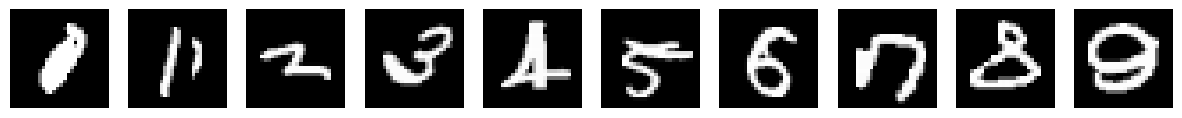

In [10]:
def get_best_worst_samples(x_train, y_train, model):
    '''
    Returns the best and worst samples for each label
    '''
    best_samples = []
    worst_samples = []

    for i in range(10):
        x = x_train[y_train == i]
        y = y_train[y_train == i]

        if isinstance(model, LogisticRegression):
            scores = model.predict_proba(x)[:, i]
        elif isinstance(model, svm.LinearSVC):
            scores = model.decision_function(x)
            if scores.ndim > 1:
                scores = scores[:, i]

        best = np.argmax(scores)
        worst = np.argmin(scores)

        best_samples.append(x[best])
        worst_samples.append(x[worst])

    return np.array(best_samples), np.array(worst_samples)
# LLR
lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)
best_samples, worst_samples = get_best_worst_samples(x_train, y_train, lr)
display_mnist(best_samples, 1, 10)
display_mnist(worst_samples, 1, 10)

# SVM
s = svm.LinearSVC(max_iter=500)
s.fit(x_train, y_train)
best_samples, worst_samples = get_best_worst_samples(x_train, y_train, s)
display_mnist(best_samples, 1, 10)
display_mnist(worst_samples, 1, 10)

c. Parameter selection: For linear SVM, use validation experiments (testing on the validation set) to estimate the best regularization strength `C`. Then evaluate a model trained with that C on the test set. For the sake of speed, in this section, use  `x_train[:1000]` as the training set for all experiments, with `max_iter=1000`.  For the validation set, use `x_train[50000:]`.

In selection, try to get the best result on the validation set within 0.1%.  To select `C`, start with the default and increase/decrease by a factor of 2 until results either level out or start to get worse. Then, you can try half way between the most two best values. E.g. try `C` in [0.25, 0.5, 1, 2, 4].  Suppose 0.5 and 1 give the best results.  Then, try 0.75.  Once the difference between the two best results is less than 0.1%, you can stop. You can also search outside of this range if 0.25 or 4 gives the best result.  Plot the validation error for each `C` value tested on a semilogx plot, and record the best in a table.

C: 0.25, Validation Error: 20.37%
C: 0.5, Validation Error: 20.95%
C: 1, Validation Error: 21.30%
C: 2, Validation Error: 21.40%
C: 4, Validation Error: 21.44%
New C: 0.375, Validation Error: 20.81%
New C: 0.3125, Validation Error: 20.63%
New C: 0.28125, Validation Error: 20.51%
New C: 0.265625, Validation Error: 20.48%
New C: 0.2578125, Validation Error: 20.40%
Expanded range: C: 0.125, Validation Error: 19.69%


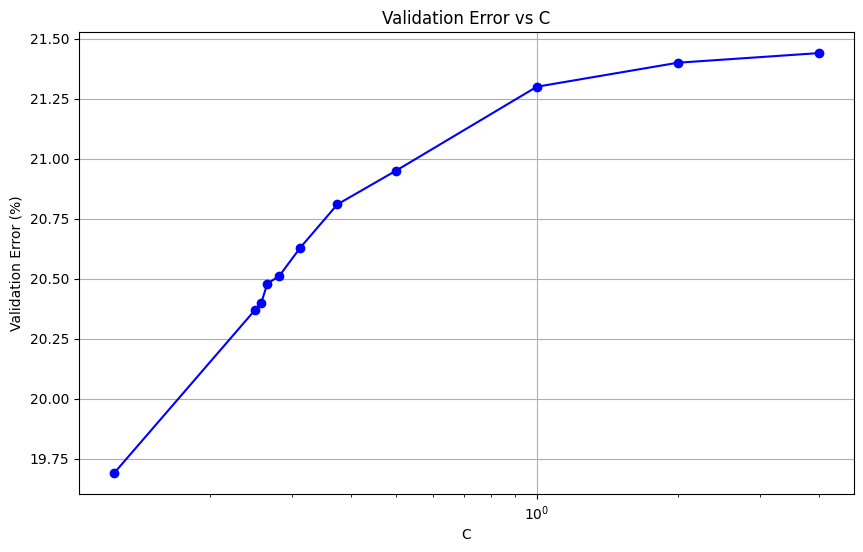

In [36]:
x_train_subset = x_train[:1000]
y_train_subset = y_train[:1000]
x_val = x_train[50000:]
y_val = y_train[50000:]

def SVM_error(model, X, y):
    return 1 - model.score(X, y)

def evaluate_C(C, x_train, y_train, x_val, y_val):
    model = svm.LinearSVC(max_iter=1000, C=C, random_state=42)
    model.fit(x_train, y_train)
    return SVM_error(model, x_val, y_val) * 100

# Initial C values
C_values = [0.25, 0.5, 1, 2, 4]
validation_errors = []

# Evaluate initial C values
for C in C_values:
    error = evaluate_C(C, x_train_subset, y_train_subset, x_val, y_val)
    validation_errors.append(error)
    print(f'C: {C}, Validation Error: {error:.2f}%')

# Find the best two C values
sorted_indices = np.argsort(validation_errors)
best_C_index, second_best_C_index = sorted_indices[:2]

# Refine search
while True:
    best_C = C_values[best_C_index]
    second_best_C = C_values[second_best_C_index]

    if abs(validation_errors[best_C_index] - validation_errors[second_best_C_index]) < 0.1:
        break

    # Try halfway between best two C values
    new_C = (best_C + second_best_C) / 2
    new_error = evaluate_C(new_C, x_train_subset, y_train_subset, x_val, y_val)

    print(f'New C: {new_C}, Validation Error: {new_error:.2f}%')

    # Insert new C value and error
    insert_index = next(i for i, C in enumerate(C_values) if C > new_C)
    C_values.insert(insert_index, new_C)
    validation_errors.insert(insert_index, new_error)

    # Update best and second best indices
    sorted_indices = np.argsort(validation_errors)
    best_C_index, second_best_C_index = sorted_indices[:2]

# Check if we need to expand the search range
if best_C_index == 0:
    new_C = C_values[0] / 2
    new_error = evaluate_C(new_C, x_train_subset, y_train_subset, x_val, y_val)
    C_values.insert(0, new_C)
    validation_errors.insert(0, new_error)
    print(f'Expanded range: C: {new_C}, Validation Error: {new_error:.2f}%')
elif best_C_index == len(C_values) - 1:
    new_C = C_values[-1] * 2
    new_error = evaluate_C(new_C, x_train_subset, y_train_subset, x_val, y_val)
    C_values.append(new_C)
    validation_errors.append(new_error)
    print(f'Expanded range: C: {new_C}, Validation Error: {new_error:.2f}%')

# Plot validation error vs C
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, validation_errors, 'bo-')
plt.xlabel('C')
plt.ylabel('Validation Error (%)')
plt.title('Validation Error vs C')
plt.grid(True)
plt.show()


In [37]:
# Get test result for selected parameter


# TO DO
# Find the best C
best_C_index = np.argmin(validation_errors)
best_C = C_values[best_C_index]
best_validation_error = validation_errors[best_C_index]

# Train final model with best C
final_model = svm.LinearSVC(max_iter=1000, C=best_C, random_state=42)
final_model.fit(x_train_subset, y_train_subset)

print(f'Best C value: {best_C}')
print(f'Validation Error: {best_validation_error:.2f}%')
print(f'Test Error: {SVM_error(final_model, x_test, y_test) * 100:.2f}%')


Final Results:
Best C value: 0.125
Validation Error: 19.69%
Test Error: 19.39%


## Part 3: Temperature Regression

We will investigate using linear regression for both prediction and feature selection.


In [40]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  drive.mount('/content/drive')
  datadir = "/content/drive/My Drive/CS 441/"
  T = np.load(datadir + 'temperature_data.npz')
  xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target date
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Feature 361: city = Cleveland, day= -1
Baseline - prediction using previous day: RMSE=3.460601246750482


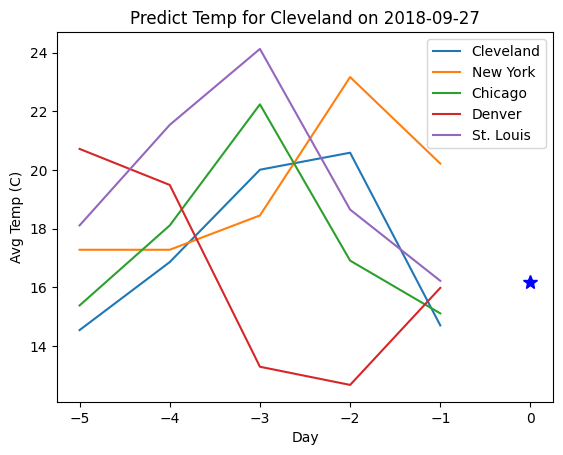

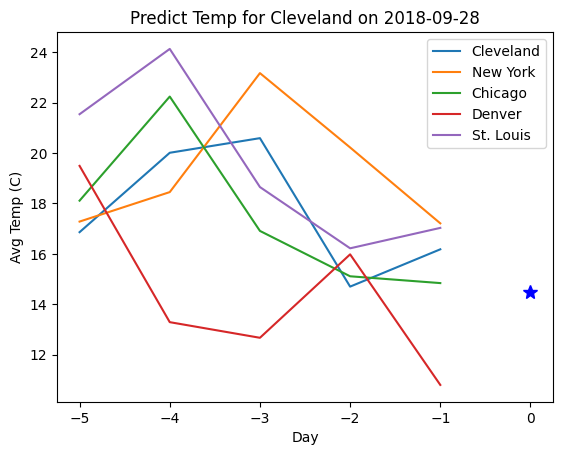

In [41]:
# load data
(xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()
''' Data format:
      x_train, y_train: features and target value for each training sample (used to fit model)
      x_val, y_val: features and target value for each validation sample (used to select hyperparameters, such as regularization and K)
      x_test, y_test: features and target value for each test sample (used to evaluate final performance)
      dates_xxx: date of the target value for the corresponding sample
      feature_to_city: maps from a feature number to the city
      feature_to_day: maps from a feature number to a day relative to the target value, e.g. -2 means two days before
      Note: 361 is the temperature of Cleveland on the previous day
'''
f = 361
print('Feature {}: city = {}, day= {}'.format(f,feature_to_city[f], feature_to_day[f]))
baseline_rmse = np.sqrt(np.mean((yt_val[1:]-yt_val[:-1])**2)) # root mean squared error
print('Baseline - prediction using previous day: RMSE={}'.format(baseline_rmse))

# plot first two x/y for val
plot_temps(xt_val[0], yt_val[0], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[0])
plot_temps(xt_val[1], yt_val[1], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[1])



a. Train and Test Linear Regression (LR):
Report RMSE results for L2-regularized linear regression (`sklearn.linear_model.Ridge`)  using default regularization parameters on the temperature regression dataset, using original and normalized features (based on feature number 361, as defined in HW1). When normalizing, remember to normalize both the training and the test sets.

In [42]:
def normalize_features(x, y, fnum):
  ''' Normalize the features in x and y.
      For each data sample i:
        x2[i] = x[i]-x[i,fnum]
        y2[i] = y[i]-x[i,fnum]
  '''
  x2 = x.copy()
  y2 = y.copy()
  for i in np.arange(len(x)):
    x2[i] = x[i] - x[i, fnum]
    y2[i] = y[i] - x[i,fnum]
  return x2, y2

In [45]:
 # linear regression (use Ridge)

# original features
# TO DO
lr = Ridge()
lr.fit(xt_train, yt_train)
y_pred = lr.predict(xt_val)
rmse = np.sqrt(np.mean((y_pred - yt_val)**2))
print(f'RMSE with original features:: {rmse:.3f}')

# normalized features
# TO DO
xt_train_norm, yt_train_norm = normalize_features(xt_train, yt_train, 361)
xt_val_norm, yt_val_norm = normalize_features(xt_val, yt_val, 361)
lr = Ridge()
lr.fit(xt_train_norm, yt_train_norm)
y_pred = lr.predict(xt_val_norm)
rmse = np.sqrt(np.mean((y_pred - yt_val_norm)**2))
print(f'RMSE with normalized features: {rmse:.3f}')

RMSE with original features:: 2.276
RMSE with normalized features: 2.287


b. Feature selection: Use original features for this part.  Identify the most important features by: (1) fitting a L1 Linear Regression model (`sklearn.linear_model.Lasso`) with default parameters; and (2) selecting the features that have coefficient magnitudes greater than 0.001 (`model.coef_` is the linear coefficient vector; -0.02 and 0.02 both have magnitude greater than 0.001).  For the top 10 features, report their indices and corresponding city and day. Also report the test RMSE error rates of L2 (ridge) linear regression when trained using only the top 10 selected features.

In [69]:
# feature analysis (select important features using Lasso)
# TO DO
lasso = Lasso()
lasso.fit(xt_train_norm, yt_train_norm)
important_features = np.where(lasso.coef_ != 0)[0]
print('Important Features:', important_features)
print('Feature Rank, Feature Number, City, Day')
for i in np.arange(len(important_features), 0, -1):
    f = important_features[i-1]
    print(len(important_features) - i + 1, f, feature_to_city[f], feature_to_day[f])

# test error using the 10 most important features for regression
# TO DO
xt_train_important = xt_train_norm[:, important_features[:10]]
xt_val_important = xt_val_norm[:, important_features[:10]]
lr = Ridge()
lr.fit(xt_train_important, yt_train_norm)
y_pred = lr.predict(xt_val_important)
rmse = np.sqrt(np.mean((y_pred - yt_val_norm)**2))
print(f'RMSE with 10 important features: {rmse:.3f}')

Important Features: [  3  37  86 175 224 251 264 271 283 307 334 347 366]
Feature Rank, Feature Number, City, Day
1 366 Kansas City -1
2 347 Minneapolis -1
3 334 Chicago -1
4 307 Omaha -2
5 283 Kansas City -2
6 271 St. Louis -2
7 264 Minneapolis -2
8 251 Chicago -2
9 224 Omaha -3
10 175 Boston -3
11 86 Miami -4
12 37 Virginia Beach -5
13 3 Miami -5
RMSE with 10 important features: 3.147


## Part 4: Stretch Goals
Include all your code used for any stretch goals in this section. Add headings where appropriate.

In [70]:
# TO DO (optional)

### a. PR and ROC curves

In [1]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression


def load_mnist():
  '''
  Loads, reshapes, and normalizes the data
  '''
  (x_train, y_train), (x_test, y_test) = mnist.load_data() # loads MNIST data
  x_train = x_train[::-1]
  y_train = y_train[::-1]
  x_train = np.reshape(x_train, (len(x_train), 28*28))  # reformat to 784-d vectors
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval  # normalize values to range from 0 to 1
  x_test = x_test/maxval
  return (x_train, y_train), (x_test, y_test)

def display_mnist(x, subplot_rows=1, subplot_cols=1):
  '''
  Displays one or more examples in a row or a grid
  '''
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


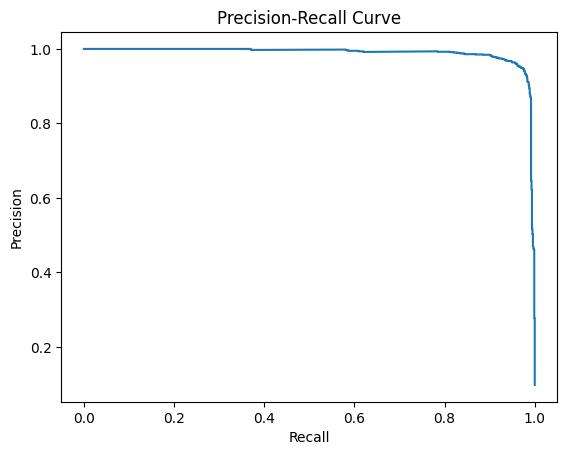

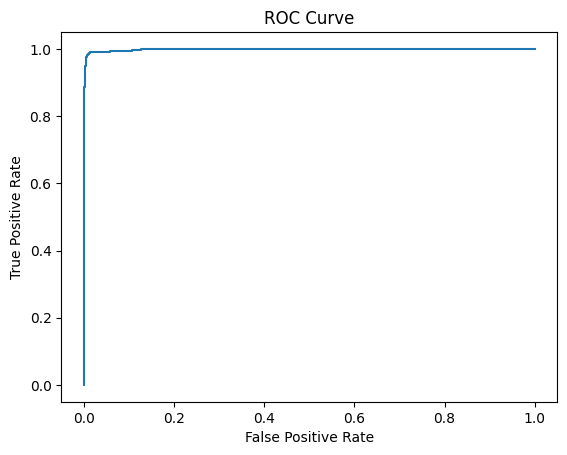

AP: 0.9888301465200937
AUC: 0.9983122539481425


In [2]:
# Often, we want to evaluate performance in a threshold-invariant way, or to see how classification varies with the confidence threshold. For LLR with default parameters, create precision-recall and ROC plots for predicting whether a digit is a “0” vs. not “0”.  You can use any libraries to do this. Also report AP and area under the curve (AUC).

from sklearn.metrics import precision_recall_curve, roc_curve, auc

(x_train, y_train), (x_test, y_test) = load_mnist()

y_train_0 = y_train == 0
y_test_0 = y_test == 0

lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train_0)
y_pred = lr.predict_proba(x_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test_0, y_pred)
fpr, tpr, _ = roc_curve(y_test_0, y_pred)

ap = auc(recall, precision)
auc_score = auc(fpr, tpr)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('AP:', ap)
print('AUC:', auc_score)


### b. Visuaize weights

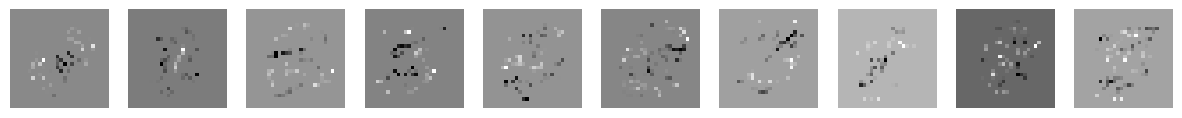

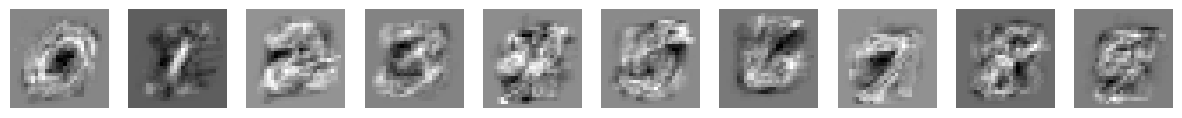

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


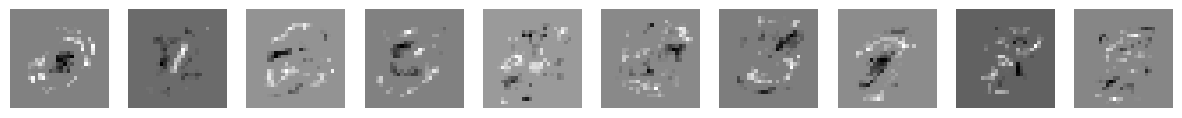

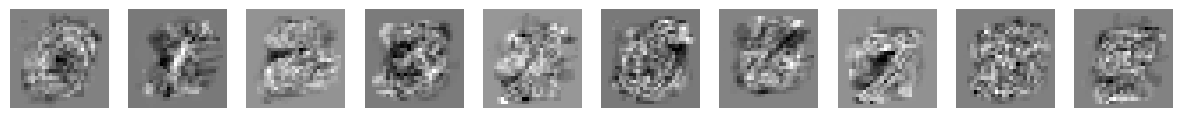

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

(x_train, y_train), (x_test, y_test) = load_mnist()

x_train_subset = x_train[:1000]
y_train_subset = y_train[:1000]

# L1
lr = LogisticRegression(max_iter=500, penalty='l1', solver='liblinear')
lr.fit(x_train_subset, y_train_subset)
display_mnist(lr.coef_, 1, 10)

# L2
lr = LogisticRegression(max_iter=500, penalty='l2')
lr.fit(x_train_subset, y_train_subset)
display_mnist(lr.coef_, 1, 10)

# Elastic regularization
lr = LogisticRegression(max_iter=500, penalty='elasticnet', solver='saga', l1_ratio=0.5)
lr.fit(x_train_subset, y_train_subset)
display_mnist(lr.coef_, 1, 10)

# SVM
s = svm.LinearSVC(max_iter=500)
s.fit(x_train_subset, y_train_subset)
display_mnist(s.coef_, 1, 10)

### c. Other embeddings

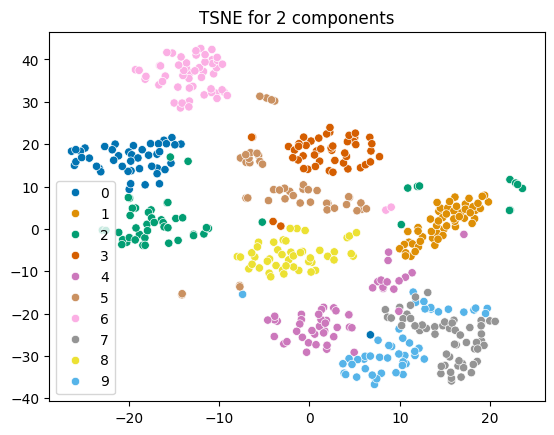

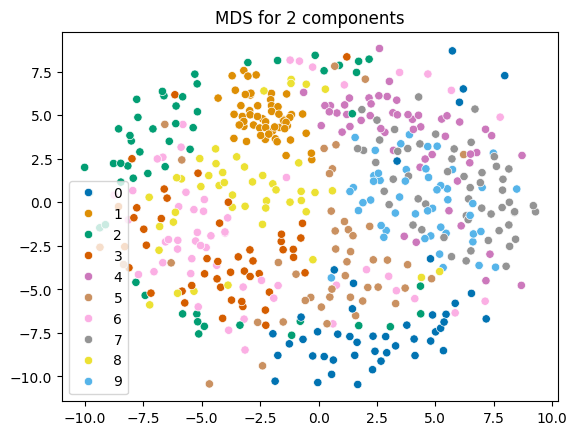

In [14]:

from sklearn.manifold import TSNE, MDS

# TSNE
tsne = TSNE(n_components=2)
x = tsne.fit_transform(x_train[:500])
ind = np.arange(500)
sns.scatterplot(x=x[ind,0],y=x[ind,1], hue=y_train[ind], palette="colorblind")
plt.title('TSNE for 2 components')
plt.show()

# MDS
mds = MDS(n_components=2)
x = mds.fit_transform(x_train[:500])
ind = np.arange(500)
sns.scatterplot(x=x[ind,0],y=x[ind,1], hue=y_train[ind], palette="colorblind")
plt.title('MDS for 2 components')
plt.show()

### d. One city is all you need

In [20]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  drive.mount('/content/drive')
  datadir = "/content/drive/My Drive/CS 441/"
  T = np.load(datadir + 'temperature_data.npz')
  xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target date
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()

(xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
def normalize_features(x, y, fnum):
  ''' Normalize the features in x and y.
      For each data sample i:
        x2[i] = x[i]-x[i,fnum]
        y2[i] = y[i]-x[i,fnum]
  '''
  x2 = x.copy()
  y2 = y.copy()
  for i in np.arange(len(x)):
    x2[i] = x[i] - x[i, fnum]
    y2[i] = y[i] - x[i,fnum]
  return x2, y2

In [26]:
# Normalize features
xt_train_norm, yt_train_norm = normalize_features(xt_train, yt_train, 361)
xt_val_norm, yt_val_norm = normalize_features(xt_val, yt_val, 361)
xt_test_norm, yt_test_norm = normalize_features(xt_test, yt_test, 361)

# Select city
cities = ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis']
best_city = None
best_rmse = np.inf

for city in cities:
    xt_train_city = xt_train_norm[:, feature_to_city == city]
    xt_val_city = xt_val_norm[:, feature_to_city == city]
    xt_test_city = xt_test_norm[:, feature_to_city == city]
    lr = Ridge()
    lr.fit(xt_train_city, yt_train_norm)
    y_pred = lr.predict(xt_val_city)
    rmse = np.sqrt(np.mean((y_pred - yt_val_norm)**2))
    if rmse < best_rmse:
        best_rmse = rmse
        best_city = city

print('Best City:', best_city)
print('RMSE:', best_rmse)

# Test RMSE
xt_train_best_city = xt_train_norm[:, feature_to_city == best_city]
xt_test_best_city = xt_test_norm[:, feature_to_city == best_city]
lr = Ridge()
lr.fit(xt_train_best_city, yt_train_norm)
y_pred = lr.predict(xt_test_best_city)
rmse = np.sqrt(np.mean((y_pred - yt_test_norm)**2))
print('Test RMSE:', rmse)

Best City: St. Louis
RMSE: 2.5170574996977484
Test RMSE: 2.6127521722523976


### e. Compare linear SVM and SVM with RBF kernel

In [5]:
def SVM_Linear_error(x_train_subset, y_train_subset):
  s = svm.LinearSVC(max_iter=500)
  s.fit(x_train_subset, y_train_subset)
  y_pred = s.predict(x_test)
  return np.mean(y_pred != y_test)

def SVM_RBF_error(x_train_subset, y_train_subset):
  s = svm.SVC(max_iter=500)
  s.fit(x_train_subset, y_train_subset)
  y_pred = s.predict(x_test)
  return np.mean(y_pred != y_test)

In [6]:
svm_errors = []
svm_rbf_errors = []

for size in [100, 1000, 10000, 60000]:
    x_train_subset = x_train[:size]
    y_train_subset = y_train[:size]

    svm_error_percentage = SVM_Linear_error(x_train_subset, y_train_subset) * 100
    svm_errors.append(svm_error_percentage)

    svm_rbf_error_percentage = SVM_RBF_error(x_train_subset, y_train_subset) * 100
    svm_rbf_errors.append(svm_rbf_error_percentage)

    print(f'Training Samples:{size}', f' SVM-Linear:{svm_error_percentage:.3f}', f' SVM-RBF:{svm_rbf_error_percentage:.3f}')

plt.plot([100, 1000, 10000, 60000], svm_errors, label='Linear SVM')
plt.plot([100, 1000, 10000, 60000], svm_rbf_errors, label='SVM with RBF Kernel')
plt.xlabel('Number of Training Samples')
plt.ylabel('Error Percentage')
plt.title('SVM Error Percentage')
plt.legend()

plt.show()

Training Samples:100  SVM-Linear:48.470  SVM-RBF:55.990


KeyboardInterrupt: 

In [ ]:
# from https://gist.github.com/jonathanagustin/b67b97ef12c53a8dec27b343dca4abba
# install can take a minute

import os
# @title Convert Notebook to PDF. Save Notebook to given directory
NOTEBOOKS_DIR = "/content/drive/My Drive/CS441/hw2" # @param {type:"string"}
NOTEBOOK_NAME = "CS441_FA24_HW2_Solution.ipynb" # @param {type:"string"}
#------------------------------------------------------------------------------#
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
NOTEBOOK_PATH = f"{NOTEBOOKS_DIR}/{NOTEBOOK_NAME}"
assert os.path.exists(NOTEBOOK_PATH), f"NOTEBOOK NOT FOUND: {NOTEBOOK_PATH}"
!apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!jupyter nbconvert "$NOTEBOOK_PATH" --to pdf > /dev/null 2>&1
NOTEBOOK_PDF = NOTEBOOK_PATH.rsplit('.', 1)[0] + '.pdf'
assert os.path.exists(NOTEBOOK_PDF), f"ERROR MAKING PDF: {NOTEBOOK_PDF}"
print(f"PDF CREATED: {NOTEBOOK_PDF}")